<a href="https://colab.research.google.com/github/kalyankalluri999/Academic-Projects/blob/main/Testing_Phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
import os
import pandas as pd
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
from IPython.display import SVG
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.utils import to_categorical, model_to_dot, plot_model

In [5]:
train_data_dir = ('/content/drive/MyDrive/Newfolder/Test_data/')
validation_data_dir = ('/content/drive/MyDrive/Newfolder/Train_data/')
IMAGE_SIZE = [224, 224]

In [6]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [9]:
folders = glob('/content/drive/MyDrive/Newfolder/Train_data/*')

In [10]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
#Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Newfolder/Test_data/',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 16126 images belonging to 120 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Newfolder/Train_data/',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 6000 images belonging to 120 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/20
252/252 [==============================] - 1376s 5s/step - loss: 7.0809 - accuracy: 0.6975 - val_loss: 7.1906 - val_accuracy: 0.7405
Epoch 2/20
252/252 [==============================] - 274s 1s/step - loss: 5.2297 - accuracy: 0.8076 - val_loss: 7.7434 - val_accuracy: 0.7680
Epoch 3/20
252/252 [==============================] - 269s 1s/step - loss: 4.2922 - accuracy: 0.8390 - val_loss: 7.7737 - val_accuracy: 0.7965
Epoch 4/20
252/252 [==============================] - 267s 1s/step - loss: 3.8635 - accuracy: 0.8622 - val_loss: 7.9993 - val_accuracy: 0.7950
Epoch 5/20
252/252 [==============================] - 266s 1s/step - loss: 3.4969 - accuracy: 0.8756 - val_loss: 7.7230 - val_accuracy: 0.8163
Epoch 6/20
252/252 [==============================] - 266s 1s/step - loss: 2.8418 - accuracy: 0.8971 - val_loss: 9.5535 - val_accuracy: 0.7915
Epoch 7/20
252/252 [==============================] - 266s 1s/step - loss: 2.7339 - accuracy: 0.9003 - val_loss: 9.8617 - val_accuracy: 0.801

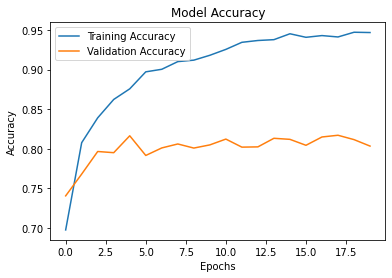

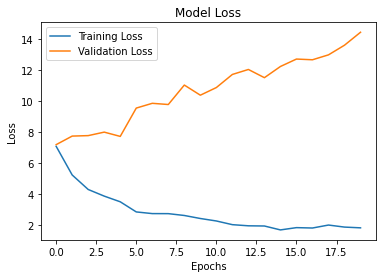

In [18]:
plt.subplot()
plt.title('Model Accuracy')
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.savefig('baseline_acc_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 900)
plt.show()

plt.title('Model Loss')
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])
plt.savefig('baseline_loss_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 900)
plt.show()